Dataset loaded successfully.
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0       27.0        0.0      24.00       0.00      19.00   
1              250       27.0        0.0      24.00       0.00      19.75   
2              500       27.0        0.0      23.50       0.50      20.00   
3              750       27.0        0.0      24.00       0.00      14.75   
4             1000       27.0        0.0      23.75       0.43      14.50   

   var_rss23  
0       1.00  
1       0.83  
2       1.22  
3       1.48  
4       1.50  

Simulating data stream...

Streaming row 1 of 480:
{'# Columns: time': 0.0, 'avg_rss12': 27.0, 'var_rss12': 0.0, 'avg_rss13': 24.0, 'var_rss13': 0.0, 'avg_rss23': 19.0, 'var_rss23': 1.0}

Streaming row 2 of 480:
{'# Columns: time': 250.0, 'avg_rss12': 27.0, 'var_rss12': 0.0, 'avg_rss13': 24.0, 'var_rss13': 0.0, 'avg_rss23': 19.75, 'var_rss23': 0.83}

Streaming row 3 of 480:
{'# Columns: time': 500.0, 'avg_rss12': 

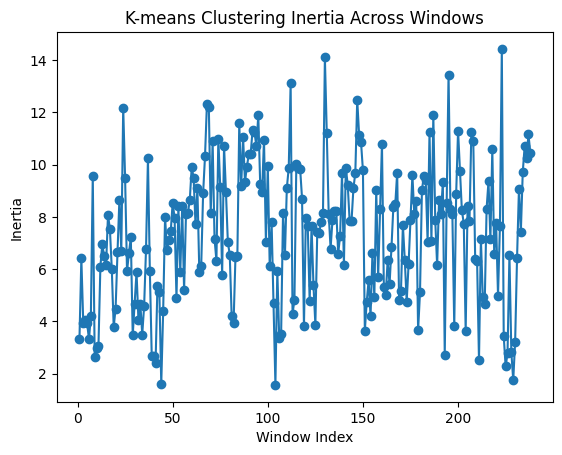

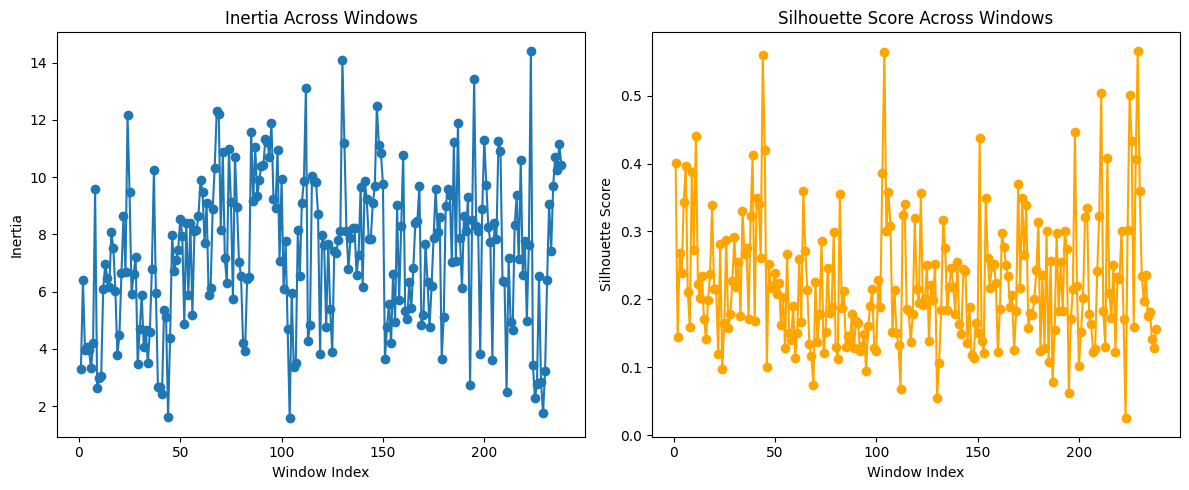

In [1]:

import pandas as pd
import time
# Update file path as per your system
dataset_path = "/Users/muskan/deeplearning/bda/dataset2.csv"
df = pd.read_csv(dataset_path, skiprows=4)
print("Dataset loaded successfully.")

print(df.head())


#(b) Function to simulate streaming data
def simulate_streaming_data(data, delay=0.5):
    """
    Simulates streaming data by yielding one row at a time.
    Parameters:
        data (pd.DataFrame): The input dataset.
        delay (float): Time delay (in seconds) between each row emission.
    """
    for index, row in data.iterrows():
        print(f"\nStreaming row {index + 1} of {len(data)}:")
        print(row.to_dict())  # Display the row data as a dictionary
        yield row
        time.sleep(delay)  # Simulate delay between streams

# Simulate streaming the dataset
print("\nSimulating data stream...")
for streamed_row in simulate_streaming_data(df, delay=0.5):
    # Process the streamed row here (e.g., perform analysis or pass to a model)
    pass

#(c) Extract the different data windows using a windowing technique
import pandas as pd


def sliding_window(data, window_size, stride):
    """
    Generate sliding windows from the dataset.
    Parameters:
        data (pd.DataFrame): The dataset.
        window_size (int): The size of each window.
        stride (int): The step size to move the window.
    Returns:
        List of sliding windows as DataFrames.
    """
    windows = []
    for i in range(0, len(data) - window_size + 1, stride):
        windows.append(data.iloc[i:i + window_size])
    return windows

def tumbling_window(data, window_size):
    """
    Generate tumbling windows from the dataset.
    Parameters:
        data (pd.DataFrame): The dataset.
        window_size (int): The size of each window.
    Returns:
        List of tumbling windows as DataFrames.
    """
    windows = []
    for i in range(0, len(data), window_size):
        windows.append(data.iloc[i:i + window_size])
    return windows

# Parameters
window_size = 5
stride = 2

# Extract sliding windows
sliding_windows = sliding_window(df, window_size, stride)
print(f"Sliding Windows (window size={window_size}, stride={stride}):")
for i, window in enumerate(sliding_windows):
    print(f"\nWindow {i + 1}:\n{window}")

# Extract tumbling windows
tumbling_windows = tumbling_window(df, window_size)
print(f"\nTumbling Windows (window size={window_size}):")
for i, window in enumerate(tumbling_windows):
    print(f"\nWindow {i + 1}:\n{window}")
    

#(d)Perform clustering using k-means algorithm on different data windows
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract sliding windows (from the previous step)
def sliding_window(data, window_size, stride):
    windows = []
    for i in range(0, len(data) - window_size + 1, stride):
        windows.append(data.iloc[i:i + window_size])
    return windows

# Parameters
window_size = 5
stride = 2
sliding_windows = sliding_window(df, window_size, stride)

# Preprocess data (scaling for clustering)
scaler = StandardScaler()

# Perform clustering on each window
cluster_results = []
num_clusters = 3  # Number of clusters for k-means

for i, window in enumerate(sliding_windows):
    # Scale the data
    scaled_data = scaler.fit_transform(window)

    # Apply K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Store cluster labels and centroids
    cluster_results.append({
        "window_index": i,
        "labels": kmeans.labels_,
        "centroids": kmeans.cluster_centers_,
        "inertia": kmeans.inertia_  # Within-cluster sum of squares
    })
    
    # Visualize clustering results
for result in cluster_results:
    print(f"Window {result['window_index'] + 1}:\nCluster Labels: {result['labels']}\n")
    print(f"Cluster Centroids:\n{result['centroids']}\n")
    print(f"Inertia (within-cluster sum of squares): {result['inertia']}\n")

# Visualize inertia (clustering performance across windows)
inertias = [result['inertia'] for result in cluster_results]
plt.plot(range(1, len(sliding_windows) + 1), inertias, marker='o')
plt.title("K-means Clustering Inertia Across Windows")
plt.xlabel("Window Index")
plt.ylabel("Inertia")
plt.show()

# Draw the plots and state your observations in context of effect of window size and windowing
#techniques on the clustering performance in terms of different clustering metrics
from sklearn.metrics import silhouette_score
import numpy as np

# Parameters
num_clusters = 3
silhouette_scores = []
inertias = []

# Perform clustering for different window sizes
for i, window in enumerate(sliding_windows):
    scaled_data = scaler.fit_transform(window)

    # Apply K-means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    # Calculate inertia and silhouette score
    inertias.append(kmeans.inertia_)
    if len(window) > 1:  # Silhouette score requires at least 2 data points per cluster
        score = silhouette_score(scaled_data, kmeans.labels_)
        silhouette_scores.append(score)
    else:silhouette_scores.append(np.nan)

# Plot inertia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(sliding_windows) + 1), inertias, marker='o')
plt.title("Inertia Across Windows")
plt.xlabel("Window Index")
plt.ylabel("Inertia")

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(1, len(sliding_windows) + 1), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score Across Windows")
plt.xlabel("Window Index")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()
